In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "äll"

In [3]:
from sklearn import datasets

In [4]:
boston = datasets.load_boston()

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.target)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.

In [7]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston_df['House_Price'] = boston.target
boston_df.head()
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
x = boston_df.drop('House_Price', axis = 1)
y = boston_df['House_Price']
print(x.head())
print(y.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: House_Price, dtype: float64


In [10]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3, random_state=1)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

lm= LinearRegression()
lm_lasso = Lasso()
lm_ridge = Ridge()
lm_elastic = ElasticNet()
print(lm)
print(lm_lasso)
print(lm_ridge)
print(lm_elastic)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [12]:
print(lm.fit(train_x, train_y))
print(lm_lasso.fit(train_x, train_y))
print(lm_ridge.fit(train_x, train_y))
print(lm_elastic.fit(train_x, train_y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


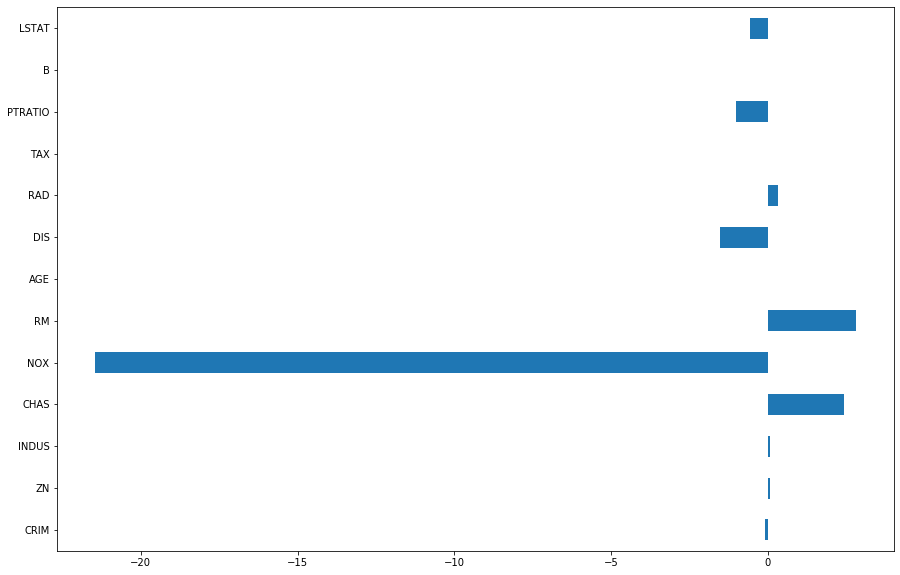

In [13]:
plt.figure(figsize=(15,10))
ft_importances_lm = pd.Series(lm.coef_, index=x.columns)
ft_importances_lm.plot(kind='barh')
plt.show()

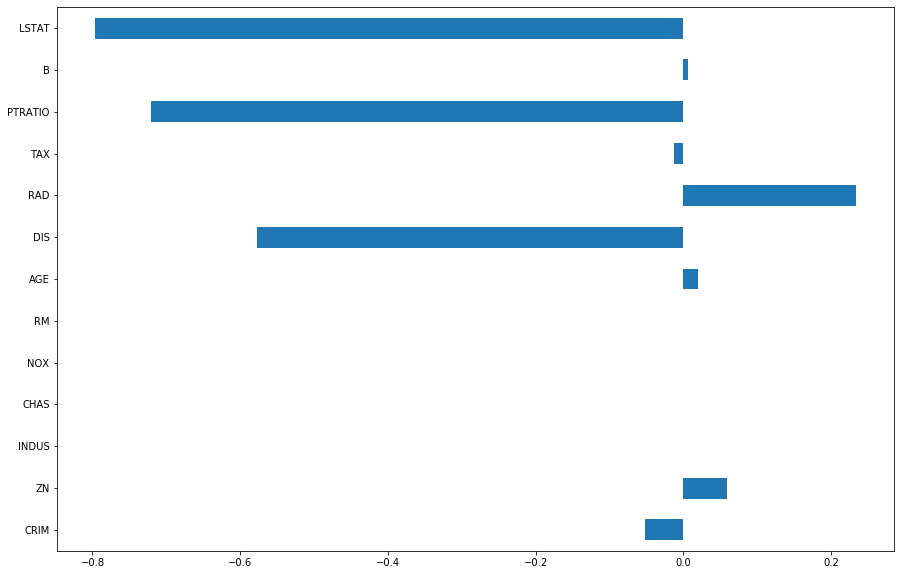

In [14]:
plt.figure(figsize=(15,10))
ft_importances_lm_lasso = pd.Series(lm_lasso.coef_, index=x.columns)
ft_importances_lm_lasso.plot(kind='barh')
plt.show()

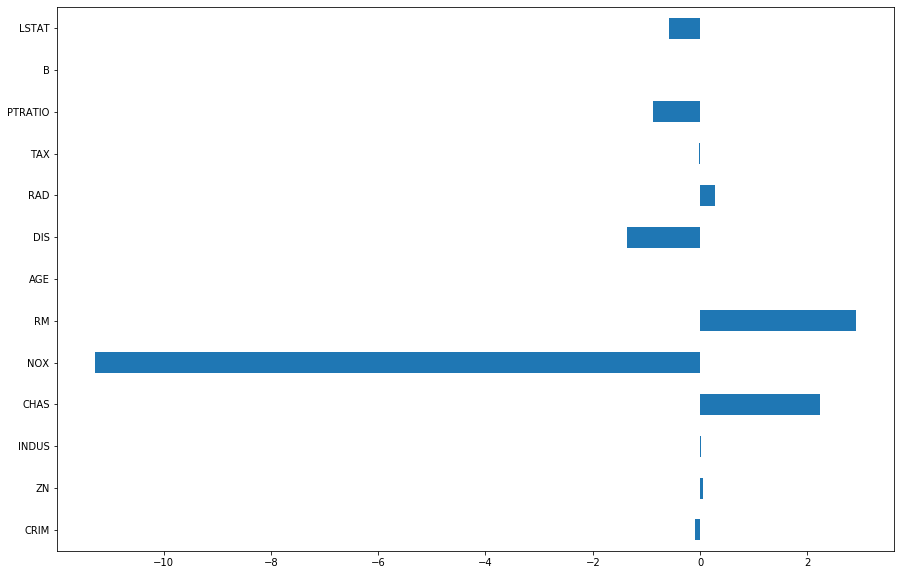

In [15]:
plt.figure(figsize=(15,10))
ft_importances_lm_ridge = pd.Series(lm_ridge.coef_, index=x.columns)
ft_importances_lm_ridge.plot(kind='barh')
plt.show()

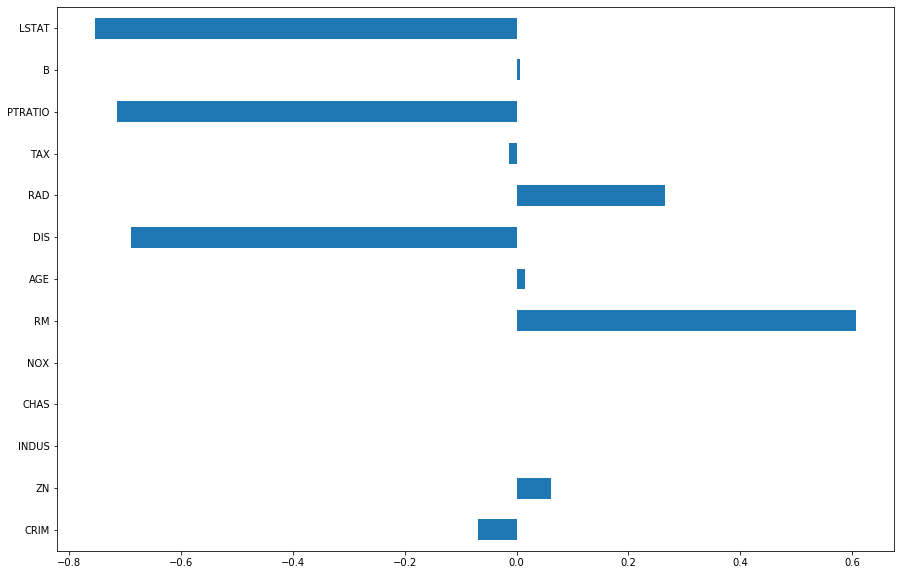

In [16]:
plt.figure(figsize=(15,10))
ft_importances_lm_elastic = pd.Series(lm_elastic.coef_, index=x.columns)
ft_importances_lm_elastic.plot(kind='barh')
plt.show()

In [17]:
print("Error in Simple Regression is")
print(np.round(lm.score(test_x,test_y)*100,2))
print("Error in Lasso Regression is")
print(np.round(lm_lasso.score(test_x,test_y)*100,2))
print("Error in Ridge Regression is")
print(np.round(lm_ridge.score(test_x,test_y)*100,2))
print("Error in Elastic Regression is")
print(np.round(lm_elastic.score(test_x,test_y)*100,2))

Error in Simple Regression is
78.36
Error in Lasso Regression is
66.95
Error in Ridge Regression is
78.91
Error in Elastic Regression is
69.98


In [18]:
predict_test_lm = lm.predict(test_x)
predict_test_lasso = lm_lasso.predict(test_x)
predict_test_ridge = lm_ridge.predict(test_x)
predict_test_elastic = lm_elastic.predict(test_x)

In [19]:
import numpy as np
from sklearn import metrics
print("Simple Regression MSE for test data is ")
print(np.round(metrics.mean_squared_error(test_y,predict_test_lm),2))

print("Lasso Regression MSE for test data is ")
print(np.round(metrics.mean_squared_error(test_y,predict_test_lasso),2))

print("Ridge Regression MSE for test data is ")
print(np.round(metrics.mean_squared_error(test_y,predict_test_ridge),2))

print("Elastic Regression MSE for test data is ")
print(np.round(metrics.mean_squared_error(test_y,predict_test_elastic),2))

Simple Regression MSE for test data is 
19.83
Lasso Regression MSE for test data is 
30.29
Ridge Regression MSE for test data is 
19.33
Elastic Regression MSE for test data is 
27.51
